# Summary of Notebook
    Looking at hour of day and total amount of amount paid
        Could create a flag to define morning, afternoon and evening - all groups would be high purchase groups
            morning = hour 8,9,10,11  afternoon = 12,13,14,15   evening = 16,17,18,19,20
    Looked at day of week and total amount paid
    Looked at department and sum of order amount paid
        Found the items in the department that generated the most money
    Age and dependents with total spent did not show anything
    Living situation indicates married spend the most and it was obvious
    Income and total spent was not helpful.
    Customers prefer organic
    South region generated highest dollars
    No difference in items purchased in South
    
        

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime as dt

In [2]:
#import pickle active customers dataframe
df_active = pd.read_pickle(r'C:\Users\Selena\Desktop\3-22 Instacart Basket Analysis\04 Analysis\active_all_plus_regions_order_paid.pkl')
path = r'C:\Users\Selena\Desktop\3-22 Instacart Basket Analysis'
df_active = pd.read_pickle(os.path.join(path, '04 Analysis', 'active_all_plus_regions_order_paid.pkl'))

In [3]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28669841 entries, 0 to 30330083
Data columns (total 31 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int16         
 3   day_of_week_ordered     int16         
 4   hour_of_day_ordered     int16         
 5   days_since_prior_order  float64       
 6   product_id              int32         
 7   add_to_cart_order       int16         
 8   reordered               int16         
 9   product_name            category      
 10  aisle_id                int16         
 11  department_id           int16         
 12  price                   float64       
 13  gender                  category      
 14  state                   category      
 15  age                     int16         
 16  date_joined             datetime64[ns]
 17  dependents              int16         
 18  

<AxesSubplot:xlabel='hour_of_day_ordered'>

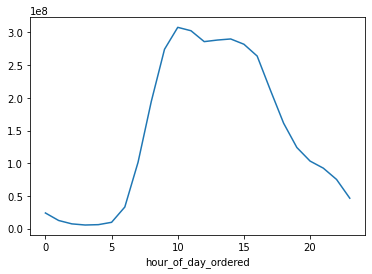

In [4]:
#try to see when highest paid orders happen for hour of day ordered
df_active.groupby('hour_of_day_ordered')['order_paid_amount'].sum().plot()

In [5]:
#try to see when highest paid orders happen for hour of day ordered
df_active.groupby('hour_of_day_ordered')['order_paid_amount'].agg('sum').sort_values(ascending=False)

hour_of_day_ordered
10    307794439.2
11    302597363.4
14    290026863.6
13    288373399.3
12    285959479.3
15    281957025.0
9     274242609.9
16    263922676.4
17    211860008.0
8     194451009.7
18    161257165.6
19    124116152.2
20    103356694.9
7     101523941.3
21     92555177.9
22     75284589.8
23     46601947.1
6      33126962.5
0      24026359.2
1      12552385.4
5       9757919.8
2       7369581.3
4       6179713.9
3       5637766.1
Name: order_paid_amount, dtype: float64

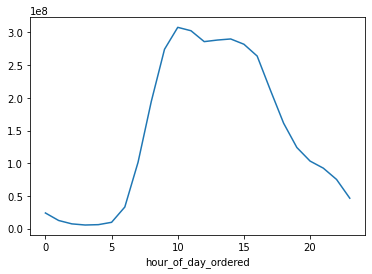

In [6]:
#exporting as a visual
line1 = df_active.groupby('hour_of_day_ordered')['order_paid_amount'].sum().plot()

In [7]:
%matplotlib inline
#saving the image within desktop folder - added visualizations
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ACTIVE_hour_of_day_sum_paid.jpg'),bbox_inches='tight')

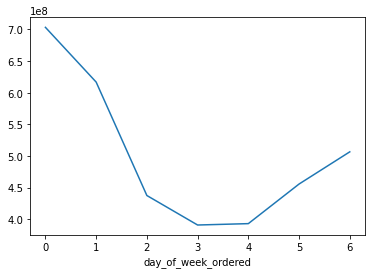

In [8]:
#try to see when highest paid orders happen for day of week ordered
line2 = df_active.groupby('day_of_week_ordered')['order_paid_amount'].sum().plot()

In [9]:
#saving the image within desktop folder - added visualizations
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ACTIVE_day_of_week_sum_paid.jpg'),bbox_inches='tight')

In [10]:
#try to see when highest paid orders happen for day of week ordered
df_active.groupby('day_of_week_ordered')['order_paid_amount'].agg('sum').sort_values(ascending=False)

day_of_week_ordered
0    703377686.7
1    616895685.1
6    506655259.1
5    455761885.1
2    437625064.4
4    393196679.2
3    391018971.2
Name: order_paid_amount, dtype: float64

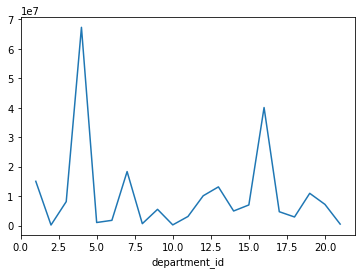

In [11]:
#try to see which department generates the most money
line3 = df_active.groupby('department_id')['price'].sum().plot()

In [12]:
#saving the image within desktop folder - added visualizations
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ACTIVE_department_sum_paid.jpg'),bbox_inches='tight')

In [13]:
#try to see which department generates the most money
df_active.groupby('department_id')['price'].agg('sum').sort_values(ascending=False)

department_id
4     67296105.0
16    40080711.2
7     18351392.7
1     15051656.3
13    13156760.1
19    10974059.7
12    10139408.5
3      8160283.1
20     7221819.5
15     7027713.0
9      5541312.1
14     4975873.1
17     4731331.4
11     3114671.5
18     2942597.9
6      1804656.1
5      1068259.2
8       675695.8
21      531986.9
10      262822.8
2       220315.7
Name: price, dtype: float64

In [14]:
#try to see which department generates the most money
df_active.groupby(['department_id', 'product_name'])['price'].agg('sum').sort_values(ascending=False)

department_id  product_name                            
4              Banana                                      5175852.3
               Bag of Organic Bananas                      3552892.3
               Large Lemon                                 1899828.0
               Limes                                       1839499.2
               Organic Baby Spinach                        1766452.2
                                                             ...    
8              Cheddar Flavored Wavy Potato Chips                0.0
               Cheddar French Fried Onions                       0.0
               Cheddar Havarti Macaroni & Cheese Dinner          0.0
               Cheddar Holiday Promo Brats                       0.0
21             with a Splash of Pineapple Coconut Water          0.0
Name: price, Length: 1043112, dtype: float64

In [15]:
#still not seeing something helpful
df_filtered = df_active.query('department_id == 4')

In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8432758 entries, 41496 to 30329875
Data columns (total 31 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int16         
 3   day_of_week_ordered     int16         
 4   hour_of_day_ordered     int16         
 5   days_since_prior_order  float64       
 6   product_id              int32         
 7   add_to_cart_order       int16         
 8   reordered               int16         
 9   product_name            category      
 10  aisle_id                int16         
 11  department_id           int16         
 12  price                   float64       
 13  gender                  category      
 14  state                   category      
 15  age                     int16         
 16  date_joined             datetime64[ns]
 17  dependents              int16         
 1

In [17]:
df_filtered['department_id'].describe()

count    8432758.0
mean           4.0
std            0.0
min            4.0
25%            4.0
50%            4.0
75%            4.0
max            4.0
Name: department_id, dtype: float64

In [18]:
#try to see which department generates the most money
df_filtered.groupby(['product_name'])['price'].agg('sum').sort_values(ascending=False).head(15)

product_name
Banana                      5175852.3
Bag of Organic Bananas      3552892.3
Large Lemon                 1899828.0
Limes                       1839499.2
Organic Baby Spinach        1766452.2
Organic Strawberries        1738998.7
Cucumber Kirby              1124032.8
Apple Honeycrisp Organic    1094724.0
Organic Cucumber            1038094.2
Organic Avocado              957581.1
Asparagus                    847632.5
Organic Baby Carrots         817315.2
Michigan Organic Kale        793293.4
Organic Hass Avocado         779096.0
Organic Tomato Cluster       762168.0
Name: price, dtype: float64

In [19]:
#now looking at department_id 16
df_filtered2 = df_active.query('department_id == 16')

In [20]:
#try to see which department generates the most money
df_filtered2.groupby(['product_name'])['price'].agg('sum').sort_values(ascending=False).head(15)

product_name
Organic Whole Milk                                       1607718.4
Half & Half                                               716752.2
Grated Parmesan                                           558370.9
Organic Whole String Cheese                               493182.0
Organic Grade A Free Range Large Brown Eggs               475727.7
Shredded Parmesan                                         470923.2
Whole Milk                                                429097.5
Unsweetened Original Almond Breeze Almond Milk            426776.0
Pure Irish Butter                                         364426.2
Unsalted Butter                                           346838.0
Organic Reduced Fat 2% Milk                               345711.9
Total 2% with Strawberry Lowfat Greek Strained Yogurt     316877.2
Total 0% Greek Yogurt                                     311018.4
Organic Large Brown Grade AA Cage Free Eggs               299370.0
2% Reduced Fat Milk                              

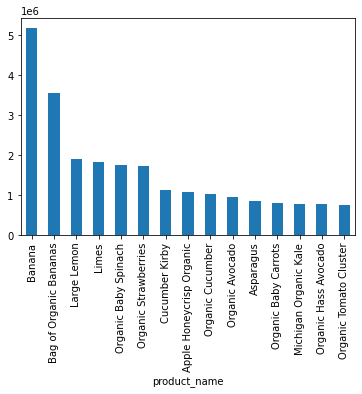

In [21]:
#department_id 4 top 15 purchased items
bar1 = df_filtered.groupby(['product_name'])['price'].agg('sum').sort_values(ascending=False).head(15).plot.bar()

In [22]:
#saving the image within desktop folder - added visualizations
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ACTIVE_department4_products_sum_paid.jpg'),bbox_inches='tight')

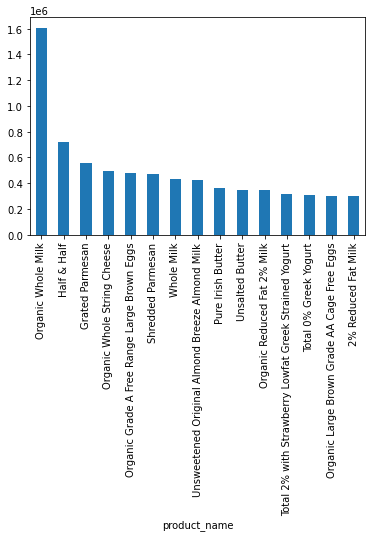

In [23]:
#department_id 16 top 15 purchased items
bar2 = df_filtered2.groupby(['product_name'])['price'].agg('sum').sort_values(ascending=False).head(15).plot.bar()

In [24]:
#saving the image within desktop folder - added visualizations
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ACTIVE_department16_products_sum_paid.jpg'),bbox_inches='tight')

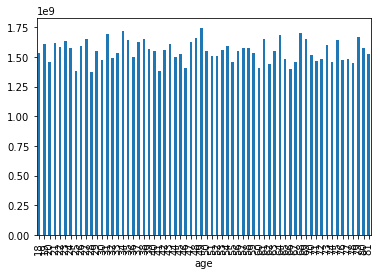

In [25]:
#looking to see if there is a difference in spending based on age
line4 = df_active.groupby('age')['total_spent'].sum().plot.bar()

#age and total spent not helpful

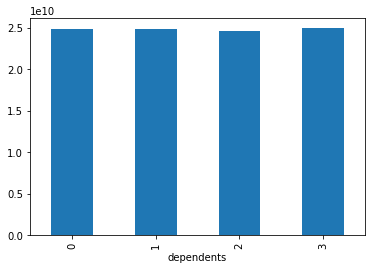

In [26]:
#looking to see if there is a difference in spending based on dependents
line5 = df_active.groupby('dependents')['total_spent'].sum().plot.bar()

#not helpful

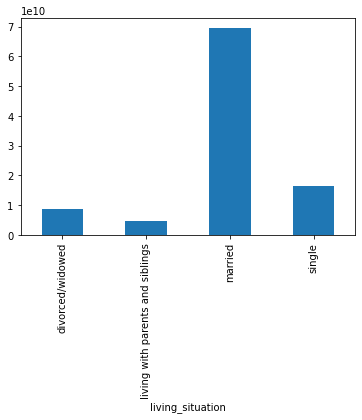

In [27]:
#looking to see if there is a difference in spending based on living situation
line6 = df_active.groupby('living_situation')['total_spent'].sum().plot.bar()

In [28]:
#saving the image within desktop folder - added visualizations
line6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ACTIVE_living_situation_total_spent.jpg'),bbox_inches='tight')

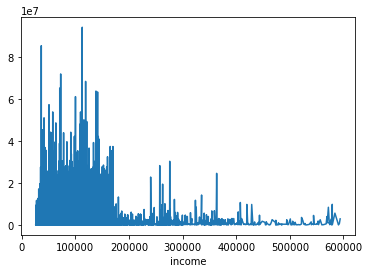

In [29]:
#looking to see if there is a difference in spending based on living situation
figure7 = df_active.groupby('income')['total_spent'].sum().plot()

In [30]:
#saving the image within desktop folder - added visualizations
figure7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ACTIVE_income_total_spent.jpg'),bbox_inches='tight')

In [31]:
#try to see the income range
df_active.groupby('income')['total_spent'].agg('sum').sort_values(ascending=False).head(20)

income
112610    94454451.8
36163     85632943.5
72344     72135836.5
118872    68582124.0
70584     65422012.4
138180    63968462.5
141212    63535959.0
99954     61298728.1
50556     57443220.7
57501     53988272.8
109407    53978198.1
41299     51173437.9
115620    50196113.5
120977    49400790.2
63330     48746269.3
108453    48189411.6
37788     45522287.7
52769     44363401.9
91131     44295559.0
54418     44151801.6
Name: total_spent, dtype: float64

#income not helpful top spenders income ranges from 36,000 to 112,610 dollars.

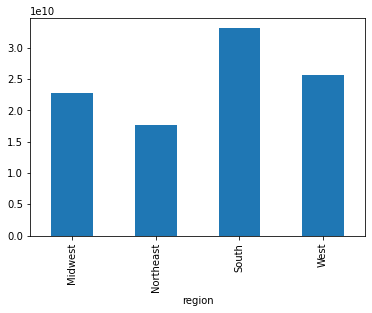

In [32]:
#looking to see if there is a difference in regions
figure8 = df_active.groupby('region')['total_spent'].sum().plot.bar()

In [33]:
#saving the image within desktop folder - added visualizations
figure8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ACTIVE_region_total_spent.jpg'),bbox_inches='tight')

In [34]:
#now looking at region = South
df_filtered3 = df_active.query("region == 'South'")

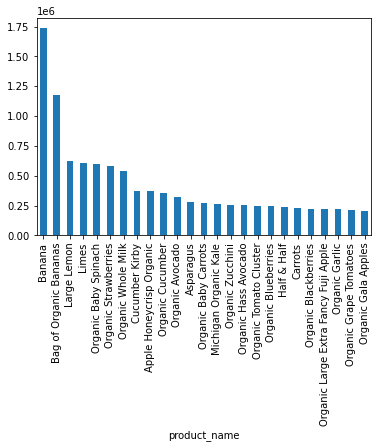

In [35]:
#seeing the products purchased
figure9 = df_filtered3.groupby(['product_name'])['price'].agg('sum').sort_values(ascending=False).head(25).plot.bar()

In [36]:
#saving the image within desktop folder - added visualizations
figure9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ACTIVE_region_product_total_spent.jpg'),bbox_inches='tight')

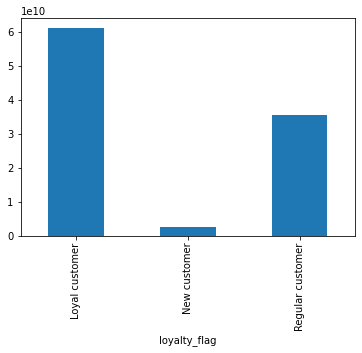

In [37]:
#looking to see if there is a difference in loyalty flag
figure10 = df_active.groupby('loyalty_flag')['total_spent'].sum().plot.bar()

In [38]:
#saving the image within desktop folder - added visualizations
figure10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ACTIVE_loyalty_total_spent.jpg'),bbox_inches='tight')

In [41]:
#now looking at loyalty
df_filtered4 = df_active.query("loyalty_flag == 'Loyal customer'")

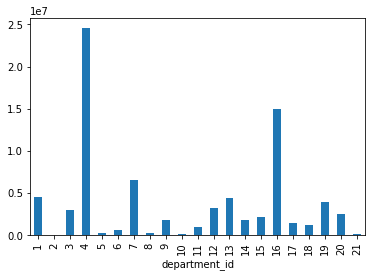

In [42]:
#seeing if loyal customers purchase differently via department id
figure11 = df_filtered4.groupby(['department_id'])['price'].sum().plot.bar()

In [43]:
#saving the image within desktop folder - added visualizations
figure11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ACTIVE_loyal_department.jpg'),bbox_inches='tight')